# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']
    
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"

In [4]:
# Create Lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
# counter to count the number of calls to API
count = 1
 # counter to count the number of call sets
sets = 1

print("Beginning Data Retrieval \n -------------------------")
for city in cities:
    
    try:
        response = requests.get(f"{query_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {count} of Set {sets} |  {city}")
        count = count+1
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
    
    # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
    if count == 51: 
        count = 1 
        sets = sets+1

print("------------------------- \nData Retrieval Complete \n-------------------------")

Beginning Data Retrieval 
 -------------------------
Processing Record 1 of Set 1 |  ushuaia
Processing Record 2 of Set 1 |  mataura
Processing Record 3 of Set 1 |  kloulklubed
Processing Record 4 of Set 1 |  port hardy
Processing Record 5 of Set 1 |  qaanaaq
Processing Record 6 of Set 1 |  cherskiy
Processing Record 7 of Set 1 |  vaini
Processing Record 8 of Set 1 |  tokur
Processing Record 9 of Set 1 |  bathsheba
Processing Record 10 of Set 1 |  antipino
Processing Record 11 of Set 1 |  deputatskiy
Processing Record 12 of Set 1 |  at-bashi
Processing Record 13 of Set 1 |  carnarvon
Processing Record 14 of Set 1 |  iskar
Processing Record 15 of Set 1 |  rawson
Processing Record 16 of Set 1 |  ponta do sol
Processing Record 17 of Set 1 |  cidreira
Processing Record 18 of Set 1 |  grindavik
Processing Record 19 of Set 1 |  bredasdorp
City not found. Skipping...
Processing Record 20 of Set 1 |  svetlogorsk
Processing Record 21 of Set 1 |  mareeba
Processing Record 22 of Set 1 |  clyde ri

City not found. Skipping...
Processing Record 33 of Set 4 |  umea
Processing Record 34 of Set 4 |  mount isa
Processing Record 35 of Set 4 |  ust-tsilma
City not found. Skipping...
Processing Record 36 of Set 4 |  hermanus
Processing Record 37 of Set 4 |  flinders
Processing Record 38 of Set 4 |  mount gambier
Processing Record 39 of Set 4 |  aklavik
Processing Record 40 of Set 4 |  kruisfontein
Processing Record 41 of Set 4 |  thompson
Processing Record 42 of Set 4 |  dobsina
Processing Record 43 of Set 4 |  bisho
Processing Record 44 of Set 4 |  linjiang
Processing Record 45 of Set 4 |  kahului
City not found. Skipping...
Processing Record 46 of Set 4 |  margate
City not found. Skipping...
Processing Record 47 of Set 4 |  anadyr
Processing Record 48 of Set 4 |  kaeo
City not found. Skipping...
Processing Record 49 of Set 4 |  bonavista
Processing Record 50 of Set 4 |  sabang
Processing Record 1 of Set 5 |  lipari
Processing Record 2 of Set 5 |  fortuna
Processing Record 3 of Set 5 | 

Processing Record 19 of Set 8 |  presidencia roque saenz pena
Processing Record 20 of Set 8 |  ahuimanu
Processing Record 21 of Set 8 |  lujan
Processing Record 22 of Set 8 |  okhotsk
Processing Record 23 of Set 8 |  anaconda
Processing Record 24 of Set 8 |  cabo san lucas
Processing Record 25 of Set 8 |  bandarbeyla
Processing Record 26 of Set 8 |  paris
Processing Record 27 of Set 8 |  sao joao da barra
Processing Record 28 of Set 8 |  slonim
Processing Record 29 of Set 8 |  ciudad bolivar
Processing Record 30 of Set 8 |  barranca
Processing Record 31 of Set 8 |  sinnamary
Processing Record 32 of Set 8 |  hay river
Processing Record 33 of Set 8 |  topolobampo
Processing Record 34 of Set 8 |  ray
Processing Record 35 of Set 8 |  vao
Processing Record 36 of Set 8 |  sterling
Processing Record 37 of Set 8 |  la ronge
Processing Record 38 of Set 8 |  sirjan
Processing Record 39 of Set 8 |  opelousas
Processing Record 40 of Set 8 |  esil
Processing Record 41 of Set 8 |  katherine
Processi

Processing Record 50 of Set 11 |  bairiki
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 12 |  gedo
Processing Record 2 of Set 12 |  kuching
Processing Record 3 of Set 12 |  jiamusi
Processing Record 4 of Set 12 |  esperance
Processing Record 5 of Set 12 |  ugoofaaru
Processing Record 6 of Set 12 |  pavlodar
Processing Record 7 of Set 12 |  kuchinarai
Processing Record 8 of Set 12 |  kelo
City not found. Skipping...
Processing Record 9 of Set 12 |  kamiiso
Processing Record 10 of Set 12 |  mackenzie
Processing Record 11 of Set 12 |  bilibino
Processing Record 12 of Set 12 |  daru
Processing Record 13 of Set 12 |  iquitos
Processing Record 14 of Set 12 |  tara
Processing Record 15 of Set 12 |  yaan
------------------------- 
Data Retrieval Complete 
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
     'City':city_name,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temp':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [7]:
# Export the city data into a .csv.
weather_df.to_csv('../output_data/weatheroutput.csv')

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,1584327864,71,-54.80,-68.30,53.60,5.82
1,Mataura,97,NZ,1584327865,68,-46.19,168.86,55.00,14.00
2,Kloulklubed,100,PW,1584327867,77,7.04,134.26,81.84,14.88
3,Port Hardy,5,CA,1584327868,48,50.70,-127.42,41.00,4.70
4,Qaanaaq,100,GL,1584327869,51,77.48,-69.36,-2.33,6.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

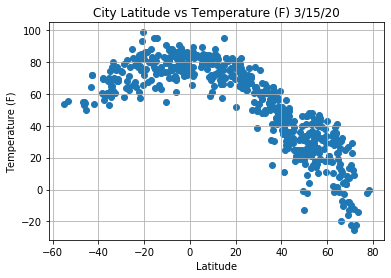

<Figure size 432x288 with 0 Axes>

In [24]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("City Latitude vs Temperature (F) 3/15/20")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig1")

This Scatter Plot shows the closer the city is to the equator, the higher the temperature.
The Southern Hemisphere appears to have higher temperatures than the Northern Hemisphere.

#### Latitude vs. Humidity Plot

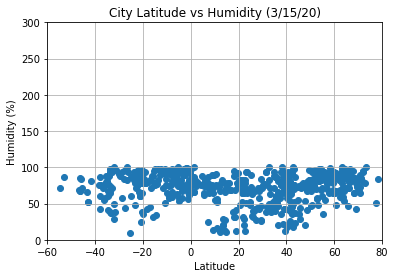

<Figure size 432x288 with 0 Axes>

In [25]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-60,80)
plt.ylim(0,300)
plt.title("City Latitude vs Humidity (3/15/20)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig2")

According to the scatter plot, Humidity % is spread out evenly across latitude. 

#### Latitude vs. Cloudiness Plot

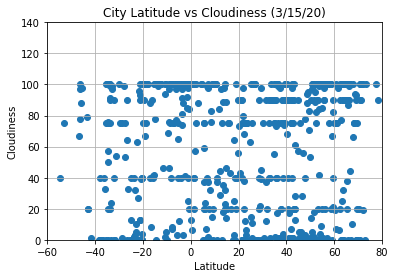

<Figure size 432x288 with 0 Axes>

In [26]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-60,80)
plt.ylim(0,140)
plt.title("City Latitude vs Cloudiness (3/15/20)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig3")

There deos not appear to be any correlation between City Latitude and Cloudiness. 

#### Latitude vs. Wind Speed Plot

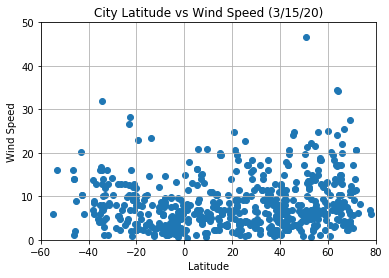

<Figure size 432x288 with 0 Axes>

In [27]:
# Create a Scatter Plot for wind speed vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(-60,80)
plt.ylim(0,50)
plt.title("City Latitude vs Wind Speed (3/15/20)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig4")

Wind Speed is pretty even throughout the various cities across latitudes. There does not seem to be any correlation between city latitude and wind speed. 

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0.01]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<-0.01]

northern_hemisphere.head()
# southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Kloulklubed,100,PW,1584327867,77,7.04,134.26,81.84,14.88
3,Port Hardy,5,CA,1584327868,48,50.70,-127.42,41.00,4.70
4,Qaanaaq,100,GL,1584327869,51,77.48,-69.36,-2.33,6.87
5,Cherskiy,94,RU,1584327870,85,68.75,161.30,8.53,6.58
7,Tokur,100,RU,1584327873,84,53.13,132.90,13.39,4.74


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8964962942012237


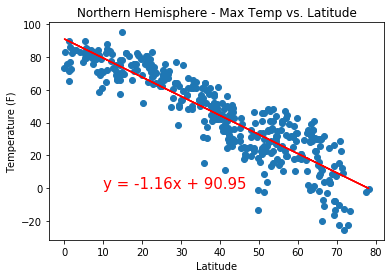

In [16]:
## Convert to floats and store Max Temp and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a very strong correlation (R-square of -0.896) between Temp and Latitude in the Northern Hemisphere. 
The closer the city to the equator, the higher the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.6107586485621985


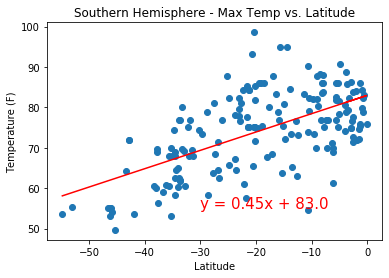

In [17]:
## Convert to floats and store Max Temp and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a strong correlation (R-squared of 0.61) between temperature and city latitude in the Southern Hemisphere. 
The closer the city to the equator, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.2670107849937739


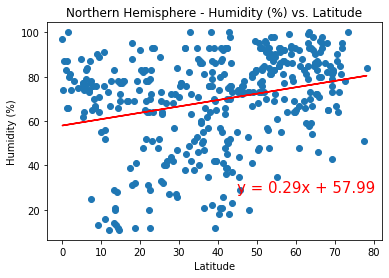

In [18]:
## Convert to floats and store Humidity and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of 0.267) between Humidity % and City Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.20005933183838984


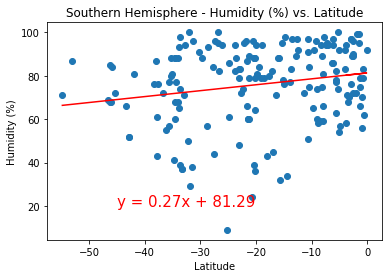

In [19]:
## Convert to floats and store Humidity and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of 0.20) between Humidity % and City Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.13554702261860432


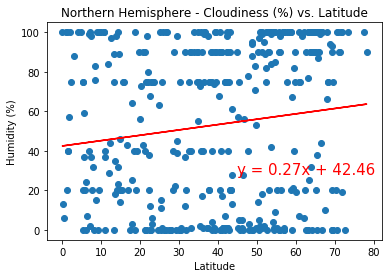

In [20]:
## Convert to floats and store Cloudiness and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a very weak correlation (R-squared of 0.136) between Cloudiness % and City Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.2585524610617003


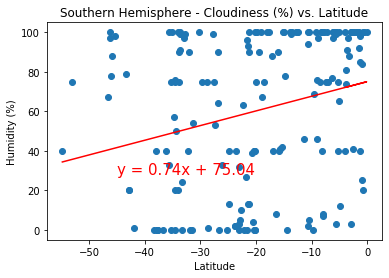

In [21]:
## Convert to floats and store Cloudiness and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of 0.259) between Cloudiness % and City Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.16759076762434133


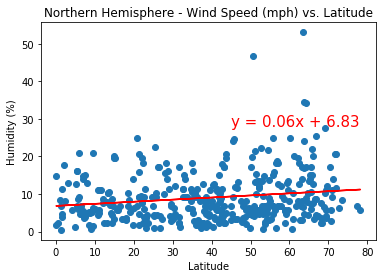

In [22]:
## Convert to floats and store Wind Speed and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a very weak correlation (R-squared of 0.168) between Wind Speed (mph) and City Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.35657760216854534


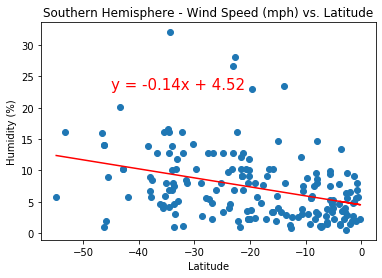

In [23]:
## Convert to floats and store Wind Speed and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,23),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of -0.357) between Wind Speed (mph) and City Latitude in the Southern Hemisphere.